In [3]:
# This EDA is important for data and time columns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel('/content/flight_price.xlsx')

In [5]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [11]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1954,Jet Airways,24/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,18:15 25 May,25h 45m,1 stop,In-flight meal not included,10844
7961,IndiGo,27/05/2019,Chennai,Kolkata,MAA → CCU,22:05,00:25 28 May,2h 20m,non-stop,No info,5277
740,Jet Airways,15/05/2019,Kolkata,Banglore,CCU → BOM → BLR,21:10,19:50 16 May,22h 40m,1 stop,In-flight meal not included,10844
678,Jet Airways,15/05/2019,Kolkata,Banglore,CCU → DEL → BLR,20:25,09:45 16 May,13h 20m,1 stop,No info,13067
7569,Jet Airways,3/05/2019,Banglore,Delhi,BLR → DEL,17:45,20:45,3h,non-stop,No info,7229


In [12]:
# Profiling of the data
df.shape

(10683, 11)

In [13]:
df.size

117513

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [15]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [17]:
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [18]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [19]:
# if there is a null value in the route there is some problem in the data
# Route has null values as per our understanding the flight cannot go from one place to another without taking a route

In [20]:
# drop the null value
df.dropna(axis = 0, inplace = True)

In [21]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [22]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [23]:
df['Date_of_Journey']

,Date_of_Journey
0,24/03/2019
1,1/05/2019
2,9/06/2019
3,12/05/2019
4,01/03/2019
...,...
10678,9/04/2019
10679,27/04/2019
10680,27/04/2019
10681,01/03/2019


In [24]:
"Ajay/Kumar".split("/")

['Ajay', 'Kumar']

In [25]:
"Ajay/Kumar".split("/")[-1]

'Kumar'

In [26]:
# different approach
df["Date_of_Journey"].str.split('/')

,Date_of_Journey
0,"[24, 03, 2019]"
1,"[1, 05, 2019]"
2,"[9, 06, 2019]"
3,"[12, 05, 2019]"
4,"[01, 03, 2019]"
...,...
10678,"[9, 04, 2019]"
10679,"[27, 04, 2019]"
10680,"[27, 04, 2019]"
10681,"[01, 03, 2019]"


In [27]:
df['month'] = df['day'] = df["Date_of_Journey"].str.split('/').str[0]

In [28]:
df['year'] = df["Date_of_Journey"].str.split('/').str[1]

In [29]:
df["Date_of_Journey"].str.split('/').str[2]

,Date_of_Journey
0,2019
1,2019
2,2019
3,2019
4,2019
...,...
10678,2019
10679,2019
10680,2019
10681,2019


In [30]:
df['day'] = df['day'].astype(int)

In [31]:
df['month'] = df['month'].astype(int)

In [32]:
df['year'] = df['year'].astype(int)

In [33]:
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [34]:
df.drop('Date_of_Journey', axis = 1, inplace = True)

In [35]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,1,3


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  month            10682 non-null  int64 
 11  day              10682 non-null  int64 
 12  year             10682 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.4+ MB


In [37]:
df['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [38]:
# split based on the space
df['Arrival_Time'].apply(lambda x : x.split(" "))

,Arrival_Time
0,"[01:10, 22, Mar]"
1,[13:15]
2,"[04:25, 10, Jun]"
3,[23:30]
4,[21:35]
...,...
10678,[22:25]
10679,[23:20]
10680,[11:20]
10681,[14:10]


In [39]:
# split based on the space
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x : x.split(" ")[0])

In [40]:
df['Arrival_Time']

,Arrival_Time
0,01:10
1,13:15
2,04:25
3,23:30
4,21:35
...,...
10678,22:25
10679,23:20
10680,11:20
10681,14:10


In [41]:
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0]

In [42]:
df['Arrival_Minute'] = df['Arrival_Time'].str.split(':').str[1]

In [43]:
df['Arrival_Hour'] = df['Arrival_Hour'].astype(int)

In [44]:
df['Arrival_Minute'] = df['Arrival_Minute'].astype(int)

In [45]:
df.drop('Arrival_Time', axis = 1, inplace = True)

In [46]:
df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,month,day,year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,1,3,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,2h 30m,non-stop,No info,4107,9,9,4,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,2h 35m,non-stop,No info,4145,27,27,4,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,3h,non-stop,No info,7229,27,27,4,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,2h 40m,non-stop,No info,12648,1,1,3,14,10


In [47]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Route,object
Dep_Time,object
Duration,object
Total_Stops,object
Additional_Info,object
Price,int64
month,int64


In [48]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'month', 'day', 'year',
       'Arrival_Hour', 'Arrival_Minute'],
      dtype='object')

In [49]:
df['Dep_Time'].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [50]:
df['Dep_Hour'] = df['Dep_Time'].str.split(':').str[0]

In [51]:
df['Dep_Minute'] = df['Dep_Time'].str.split(':').str[1]

In [52]:
df['Dep_Hour'] = df['Dep_Hour'].astype(int)

In [53]:
df['Dep_Minute'] = df['Dep_Minute'].astype(int)

In [54]:
df.drop('Dep_Time', axis = 1, inplace = True)

In [55]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Route,object
Duration,object
Total_Stops,object
Additional_Info,object
Price,int64
month,int64
day,int64


In [56]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'month', 'day', 'year', 'Arrival_Hour',
       'Arrival_Minute', 'Dep_Hour', 'Dep_Minute'],
      dtype='object')

In [57]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [58]:
df['Total_Stops'].isna().sum()

0

In [59]:
# earlier it had null values but if you do not want to drop null values at a leter stage the optional code is provided to impute with the mod values

In [60]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,month,day,year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute


In [61]:
df['Total_Stops'].mode()

,Total_Stops
0,1 stop


In [62]:
df['Total_Stops']

,Total_Stops
0,non-stop
1,2 stops
2,2 stops
3,1 stop
4,1 stop
...,...
10678,non-stop
10679,non-stop
10680,non-stop
10681,non-stop


In [63]:
# how to convert it into numerical
# you can use label encoder, onehotencoder
# but in this case what is beneficial

In [64]:
# Data Encoding
# Nominal >> OneHotEncoding
# Ordinal >> 0, 1, 2, 3
# non-stop, 1 stop has order in it

In [65]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [66]:
df['Total_Stops'] = df['Total_Stops'].map({'non_stop' : 0, '1 stop' : 1, '2 stops' : 2, '3 stops' : 3, '4 stops' : 4})

In [67]:
df['Total_Stops']

,Total_Stops
0,NaN
1,2.0
2,2.0
3,1.0
4,1.0
...,...
10678,NaN
10679,NaN
10680,NaN
10681,NaN


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10682 non-null  object 
 4   Duration         10682 non-null  object 
 5   Total_Stops      7191 non-null   float64
 6   Additional_Info  10682 non-null  object 
 7   Price            10682 non-null  int64  
 8   month            10682 non-null  int64  
 9   day              10682 non-null  int64  
 10  year             10682 non-null  int64  
 11  Arrival_Hour     10682 non-null  int64  
 12  Arrival_Minute   10682 non-null  int64  
 13  Dep_Hour         10682 non-null  int64  
 14  Dep_Minute       10682 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 1.6+ MB


In [69]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,month,day,year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,NaN,No info,3897,24,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,1,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,9,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,12,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,1,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,NaN,No info,4107,9,9,4,22,25,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,NaN,No info,4145,27,27,4,23,20,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,NaN,No info,7229,27,27,4,11,20,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,NaN,No info,12648,1,1,3,14,10,11,30


In [70]:
# if there is source and destination then route does not make any sense

In [71]:
# but it can be made useful
# route can be used in two ways
# to know source and destination which is already in the data
# as number of stops >> total stops is already there
# so route is an repetative information

In [72]:
df.drop('Route', axis = 1, inplace = True)

In [73]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,month,day,year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,NaN,No info,3897,24,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662,1,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882,9,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218,12,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302,1,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,NaN,No info,4107,9,9,4,22,25,19,55
10679,Air India,Kolkata,Banglore,2h 35m,NaN,No info,4145,27,27,4,23,20,20,45
10680,Jet Airways,Banglore,Delhi,3h,NaN,No info,7229,27,27,4,11,20,8,20
10681,Vistara,Banglore,New Delhi,2h 40m,NaN,No info,12648,1,1,3,14,10,11,30


In [74]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Duration,object
Total_Stops,float64
Additional_Info,object
Price,int64
month,int64
day,int64
year,int64


In [75]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [76]:
df['Duration Hour'] = df['Duration'].str.split(" ").str[0].str.split("h").str[0]

In [77]:
df['Duration Minutes'] = df['Duration'].str.split(" ").str[1].str.split("m").str[0]

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10682 non-null  object 
 1   Source            10682 non-null  object 
 2   Destination       10682 non-null  object 
 3   Duration          10682 non-null  object 
 4   Total_Stops       7191 non-null   float64
 5   Additional_Info   10682 non-null  object 
 6   Price             10682 non-null  int64  
 7   month             10682 non-null  int64  
 8   day               10682 non-null  int64  
 9   year              10682 non-null  int64  
 10  Arrival_Hour      10682 non-null  int64  
 11  Arrival_Minute    10682 non-null  int64  
 12  Dep_Hour          10682 non-null  int64  
 13  Dep_Minute        10682 non-null  int64  
 14  Duration Hour     10682 non-null  object 
 15  Duration Minutes  9650 non-null   object 
dtypes: float64(1), int64(8), object(7)
memory usa

In [79]:
df['Duration Minutes'] = df['Duration Minutes'].astype(float)

In [80]:
df['Duration Hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [81]:
df['Duration Hour'] = df['Duration Hour'].str.replace("m", "")

In [82]:
df['Duration Hour'] = df['Duration Hour'].astype('int')

In [83]:
df.drop('Duration', axis = 1, inplace = True)

In [84]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Total_Stops,float64
Additional_Info,object
Price,int64
month,int64
day,int64
year,int64
Arrival_Hour,int64


In [85]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [86]:
# it does not make any sense
# either you drop additionaol info
# let's say you want to keep it

In [87]:
df[['Airline', 'Source', 'Destination', 'Additional_Info']]

,Airline,Source,Destination,Additional_Info
0,IndiGo,Banglore,New Delhi,No info
1,Air India,Kolkata,Banglore,No info
2,Jet Airways,Delhi,Cochin,No info
3,IndiGo,Kolkata,Banglore,No info
4,IndiGo,Banglore,New Delhi,No info
...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,No info
10679,Air India,Kolkata,Banglore,No info
10680,Jet Airways,Banglore,Delhi,No info
10681,Vistara,Banglore,New Delhi,No info


In [88]:
# It is clearly seen that it is an nominal data
# you cannot say banglore is better than kolkata
# or this flight is better than that flight

In [89]:
# We can do encoding to convert this into numerical columns

In [90]:
df.Additional_Info.value_counts()

,count
Additional_Info,
No info,8344
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [91]:
# all of the above categorical data is nominal data
# we will be using OneHotEncoding

In [92]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [93]:
encoder

OneHotEncoder()

In [94]:
encoder.fit_transform(df[['Airline', 'Source', 'Destination', 'Additional_Info']]).toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [95]:
encoder.get_feature_names_out()

array(['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara',
       'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover',
       'Additional_Info_2 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye fli

In [96]:
encoded_data = encoder.fit_transform(df[['Airline', 'Source', 'Destination', 'Additional_Info']]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out())

In [97]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,day,year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration Hour,Duration Minutes
0,IndiGo,Banglore,New Delhi,NaN,No info,3897,24,24,3,1,10,22,20,2,50.0
1,Air India,Kolkata,Banglore,2.0,No info,7662,1,1,5,13,15,5,50,7,25.0
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,9,9,6,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,1.0,No info,6218,12,12,5,23,30,18,5,5,25.0
4,IndiGo,Banglore,New Delhi,1.0,No info,13302,1,1,3,21,35,16,50,4,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,NaN,No info,4107,9,9,4,22,25,19,55,2,30.0
10679,Air India,Kolkata,Banglore,NaN,No info,4145,27,27,4,23,20,20,45,2,35.0
10680,Jet Airways,Banglore,Delhi,NaN,No info,7229,27,27,4,11,20,8,20,3,NaN
10681,Vistara,Banglore,New Delhi,NaN,No info,12648,1,1,3,14,10,11,30,2,40.0


In [98]:
df.drop(["Airline", "Source", "Destination", "Additional_Info"], axis = 1, inplace = True)

In [99]:
df

,Total_Stops,Price,month,day,year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration Hour,Duration Minutes
0,NaN,3897,24,24,3,1,10,22,20,2,50.0
1,2.0,7662,1,1,5,13,15,5,50,7,25.0
2,2.0,13882,9,9,6,4,25,9,25,19,NaN
3,1.0,6218,12,12,5,23,30,18,5,5,25.0
4,1.0,13302,1,1,3,21,35,16,50,4,45.0
...,...,...,...,...,...,...,...,...,...,...,...
10678,NaN,4107,9,9,4,22,25,19,55,2,30.0
10679,NaN,4145,27,27,4,23,20,20,45,2,35.0
10680,NaN,7229,27,27,4,11,20,8,20,3,NaN
10681,NaN,12648,1,1,3,14,10,11,30,2,40.0


In [100]:
encoded_df

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10678,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10679,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [101]:
final_df = pd.concat([df, encoded_df], axis = 1)

In [102]:
final_df

,Total_Stops,Price,month,day,year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration Hour,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,NaN,3897.0,24.0,24.0,3.0,1.0,10.0,22.0,20.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,7662.0,1.0,1.0,5.0,13.0,15.0,5.0,50.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,13882.0,9.0,9.0,6.0,4.0,25.0,9.0,25.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,6218.0,12.0,12.0,5.0,23.0,30.0,18.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,13302.0,1.0,1.0,3.0,21.0,35.0,16.0,50.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,NaN,4145.0,27.0,27.0,4.0,23.0,20.0,20.0,45.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10680,NaN,7229.0,27.0,27.0,4.0,11.0,20.0,8.0,20.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10681,NaN,12648.0,1.0,1.0,3.0,14.0,10.0,11.0,30.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10682,2.0,11753.0,9.0,9.0,5.0,19.0,15.0,10.0,55.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
final_df.dtypes

,0
Total_Stops,float64
Price,float64
month,float64
day,float64
year,float64
Arrival_Hour,float64
Arrival_Minute,float64
Dep_Hour,float64
Dep_Minute,float64
Duration Hour,float64


In [104]:
# internal homework
# univariate analysis
# bivariate analysis
# multivariate analysis
# considering price as target variable seperate X and y
# train test split
# scaling

In [105]:
final_df

,Total_Stops,Price,month,day,year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration Hour,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,NaN,3897.0,24.0,24.0,3.0,1.0,10.0,22.0,20.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,7662.0,1.0,1.0,5.0,13.0,15.0,5.0,50.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,13882.0,9.0,9.0,6.0,4.0,25.0,9.0,25.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,6218.0,12.0,12.0,5.0,23.0,30.0,18.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,13302.0,1.0,1.0,3.0,21.0,35.0,16.0,50.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,NaN,4145.0,27.0,27.0,4.0,23.0,20.0,20.0,45.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10680,NaN,7229.0,27.0,27.0,4.0,11.0,20.0,8.0,20.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10681,NaN,12648.0,1.0,1.0,3.0,14.0,10.0,11.0,30.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10682,2.0,11753.0,9.0,9.0,5.0,19.0,15.0,10.0,55.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
final_df.columns

Index(['Total_Stops', 'Price', 'month', 'day', 'year', 'Arrival_Hour',
       'Arrival_Minute', 'Dep_Hour', 'Dep_Minute', 'Duration Hour',
       'Duration Minutes', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Addit

In [107]:
# univariate analysis
final_df.columns

Index(['Total_Stops', 'Price', 'month', 'day', 'year', 'Arrival_Hour',
       'Arrival_Minute', 'Dep_Hour', 'Dep_Minute', 'Duration Hour',
       'Duration Minutes', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Addit

In [108]:
final_df['Total_Stops'].value_counts()

,count
Total_Stops,
1.0,5625
2.0,1520
3.0,45
4.0,1


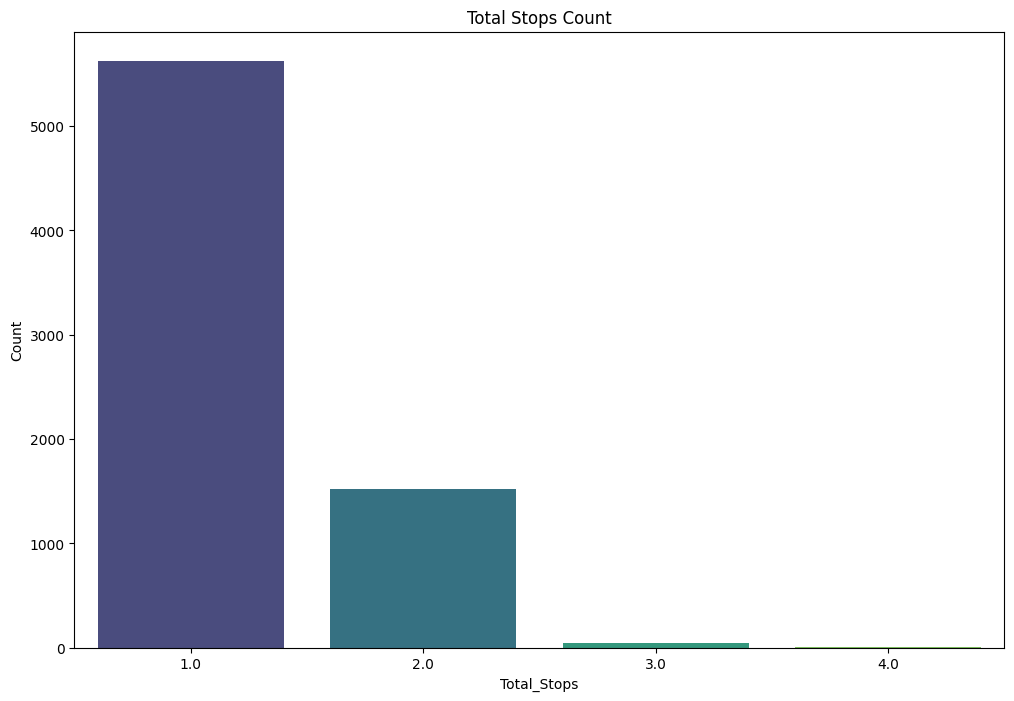

In [109]:
plt.figure(figsize = (12, 8))
sns.countplot(x = 'Total_Stops', data = final_df, palette = 'viridis')
plt.title('Total Stops Count')
plt.xlabel("Total_Stops")
plt.ylabel("Count")
plt.show()

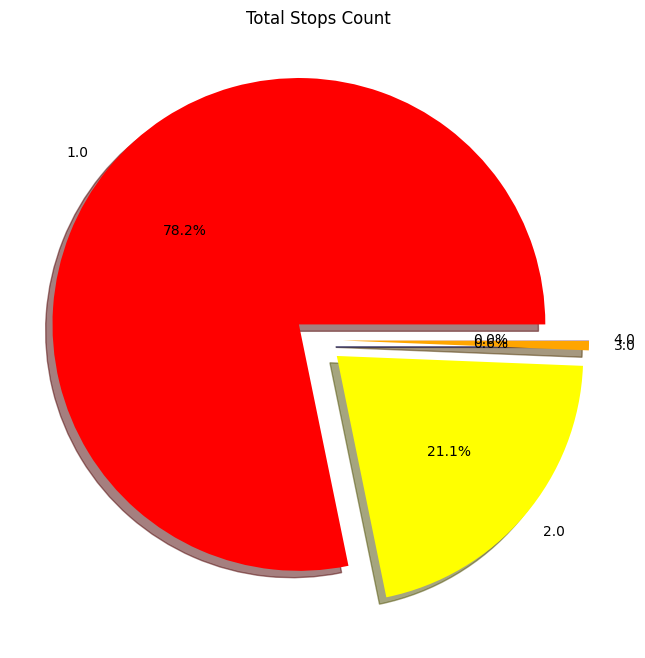

In [110]:
plt.figure(figsize=(12, 8))

# Getting value counts
stop_counts = final_df['Total_Stops'].value_counts()

# Correct color usage
colors = ['red', 'yellow', 'orange', 'blue', 'green'][:len(stop_counts)]  # Ensure enough colors

# Dynamically set explode
explode = [0.1] * len(stop_counts)

plt.pie(stop_counts, autopct='%1.1f%%', colors=colors, labels=stop_counts.index, shadow=True, explode=explode)

plt.title('Total Stops Count')

plt.show()


In [111]:
final_df.columns

Index(['Total_Stops', 'Price', 'month', 'day', 'year', 'Arrival_Hour',
       'Arrival_Minute', 'Dep_Hour', 'Dep_Minute', 'Duration Hour',
       'Duration Minutes', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Addit

In [112]:
final_df['Price'].value_counts()

,count
Price,
10262.0,258
10844.0,212
7229.0,162
4804.0,160
4823.0,131
...,...
14153.0,1
8488.0,1
7826.0,1


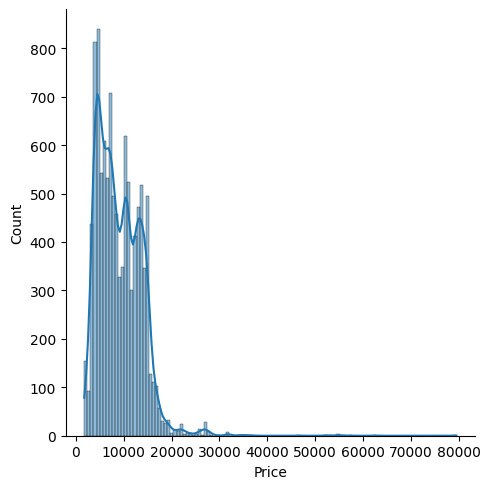

In [113]:
sns.displot(final_df['Price'], kde = True)
plt.show()

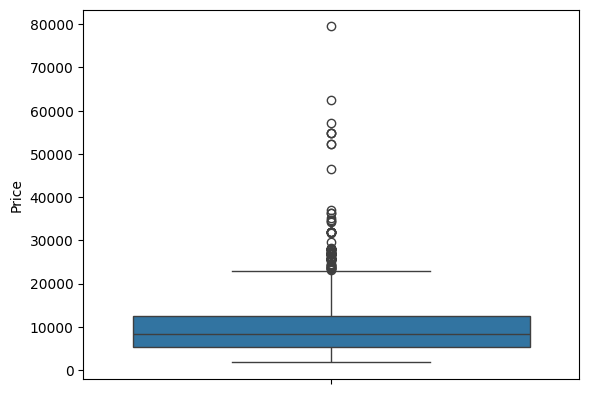

In [114]:
sns.boxplot(final_df['Price'])
plt.show()

In [115]:
final_df.columns

Index(['Total_Stops', 'Price', 'month', 'day', 'year', 'Arrival_Hour',
       'Arrival_Minute', 'Dep_Hour', 'Dep_Minute', 'Duration Hour',
       'Duration Minutes', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Addit

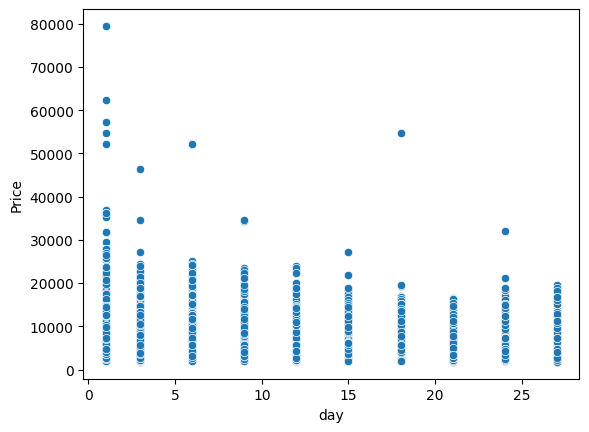

In [116]:
# biavariate analysis
sns.scatterplot(x = 'day', y = 'Price', data = final_df)
plt.show()

In [117]:
final_df.columns

Index(['Total_Stops', 'Price', 'month', 'day', 'year', 'Arrival_Hour',
       'Arrival_Minute', 'Dep_Hour', 'Dep_Minute', 'Duration Hour',
       'Duration Minutes', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Addit

In [120]:
final_df.shape

(10683, 44)

In [119]:
list(final_df.columns)

['Total_Stops',
 'Price',
 'month',
 'day',
 'year',
 'Arrival_Hour',
 'Arrival_Minute',
 'Dep_Hour',
 'Dep_Minute',
 'Duration Hour',
 'Duration Minutes',
 'Airline_Air Asia',
 'Airline_Air India',
 'Airline_GoAir',
 'Airline_IndiGo',
 'Airline_Jet Airways',
 'Airline_Jet Airways Business',
 'Airline_Multiple carriers',
 'Airline_Multiple carriers Premium economy',
 'Airline_SpiceJet',
 'Airline_Trujet',
 'Airline_Vistara',
 'Airline_Vistara Premium economy',
 'Source_Banglore',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Banglore',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Destination_New Delhi',
 'Additional_Info_1 Long layover',
 'Additional_Info_1 Short layover',
 'Additional_Info_2 Long layover',
 'Additional_Info_Business class',
 'Additional_Info_Change airports',
 'Additional_Info_In-flight meal not included',
 'Additional_Info_No Info',
 'Additional_Info_No check-in baggage inclu

In [122]:
columns = ['Total_Stops',
 'Price',
 'month',
 'day',
 'year',
 'Arrival_Hour',
 'Arrival_Minute',
 'Dep_Hour',
 'Dep_Minute',
 'Duration Hour',
 'Duration Minutes',
 'Airline_Air Asia',
 'Airline_Air India',
 'Airline_GoAir',
 'Airline_IndiGo',
 'Airline_Jet Airways',
 'Airline_Jet Airways Business',
 'Airline_Multiple carriers',
 'Airline_Multiple carriers Premium economy',
 'Airline_SpiceJet',
 'Airline_Trujet',
 'Airline_Vistara',
 'Airline_Vistara Premium economy',
 'Source_Banglore',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Banglore',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Destination_New Delhi',
 'Additional_Info_1 Long layover',
 'Additional_Info_1 Short layover',
 'Additional_Info_2 Long layover',
 'Additional_Info_Business class',
 'Additional_Info_Change airports',
 'Additional_Info_In-flight meal not included',
 'Additional_Info_No Info',
 'Additional_Info_No check-in baggage included',
 'Additional_Info_No info',
 'Additional_Info_Red-eye flight']

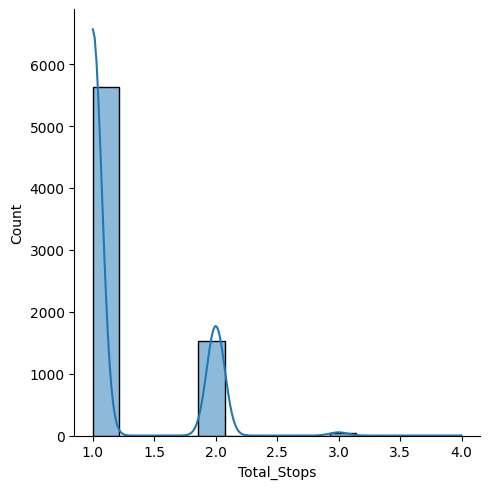

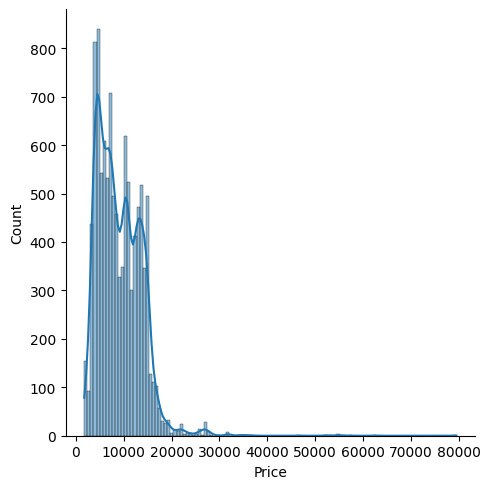

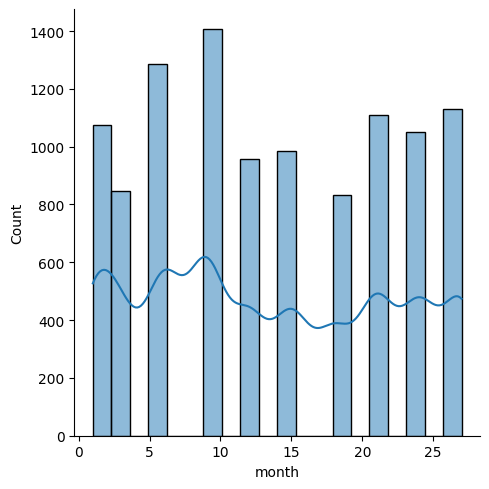

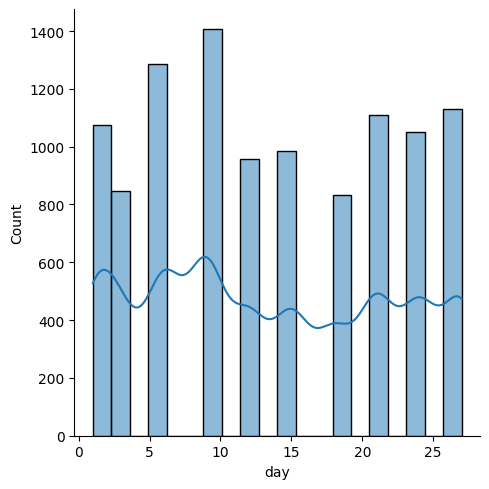

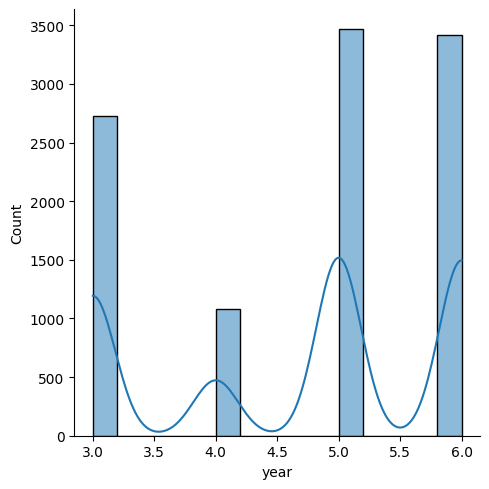

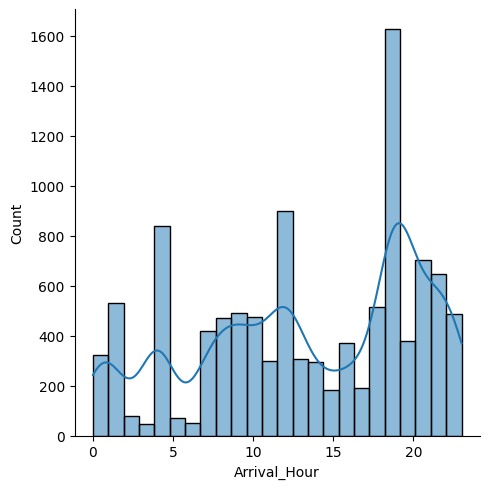

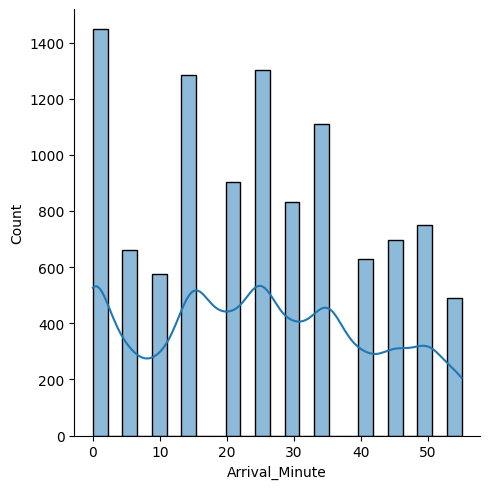

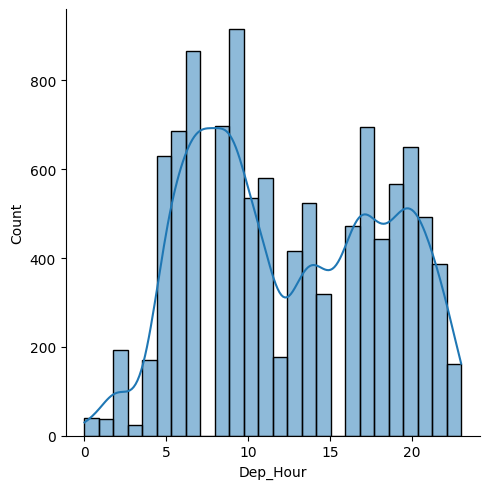

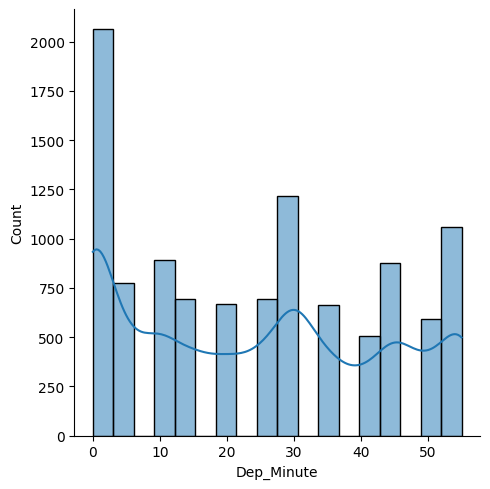

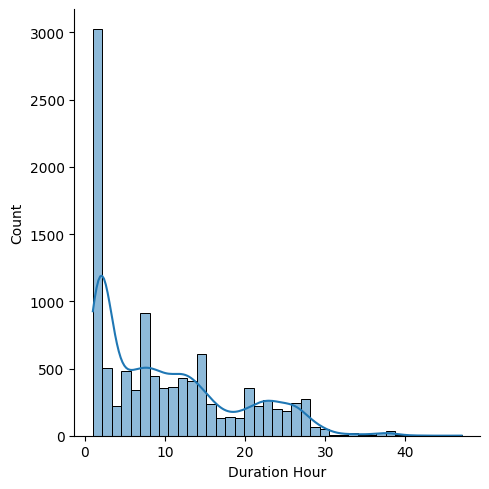

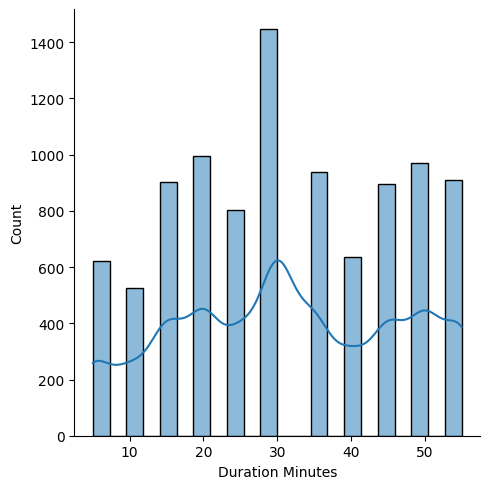

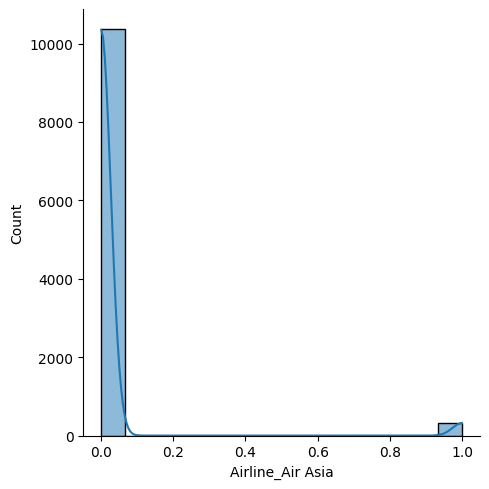

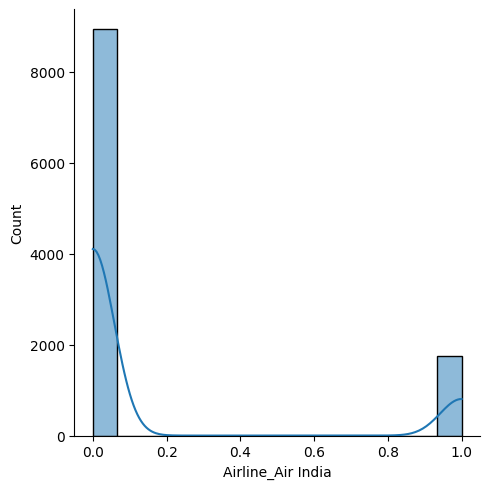

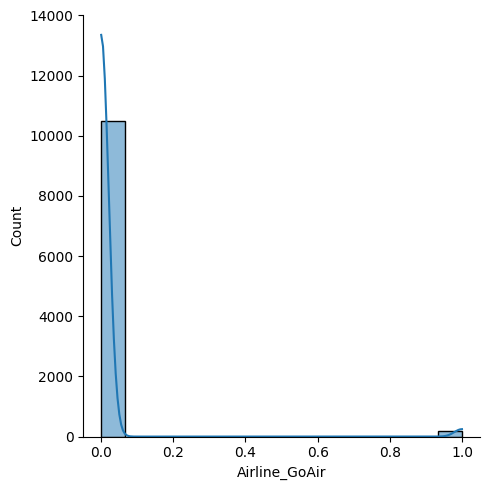

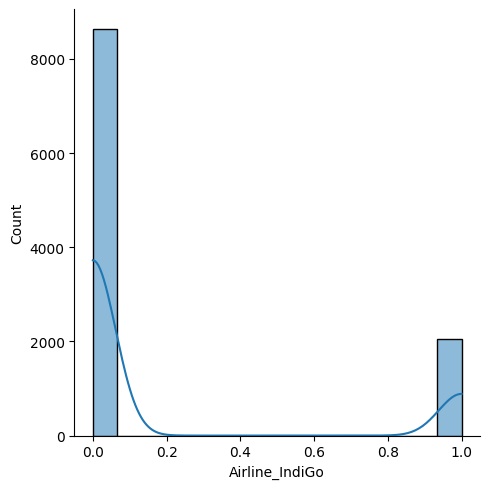

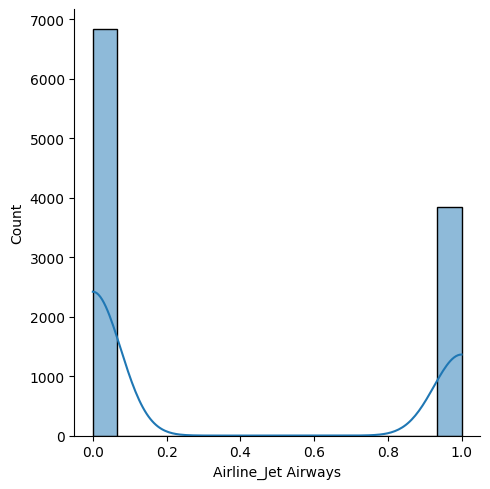

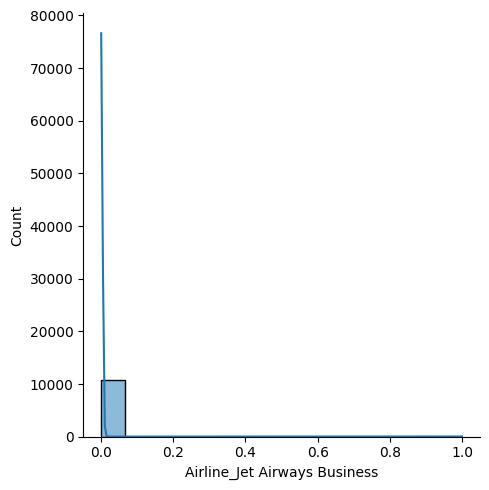

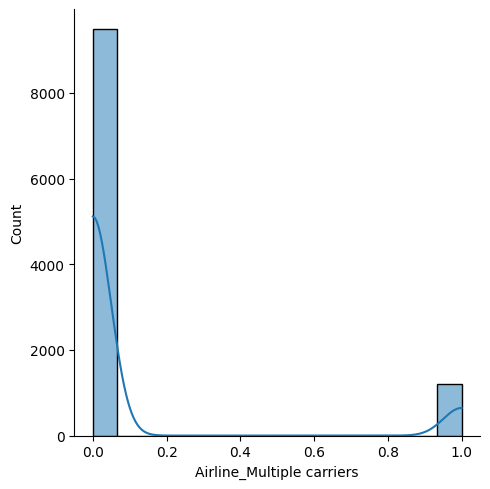

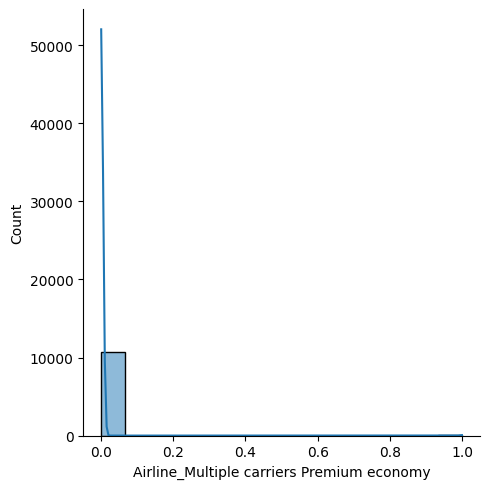

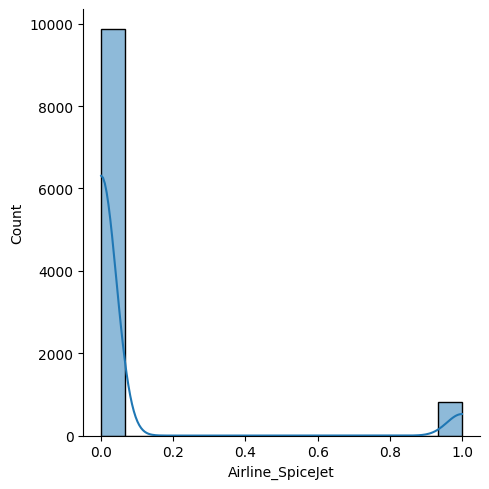

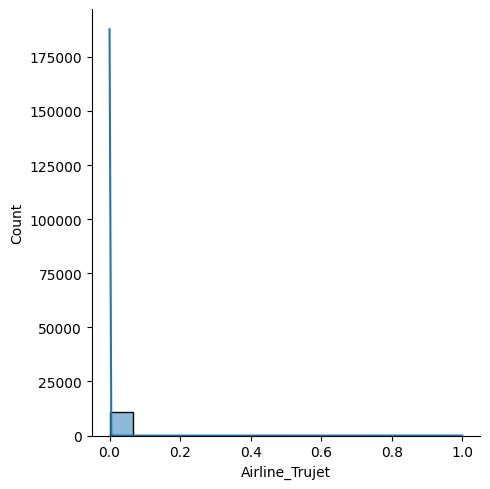

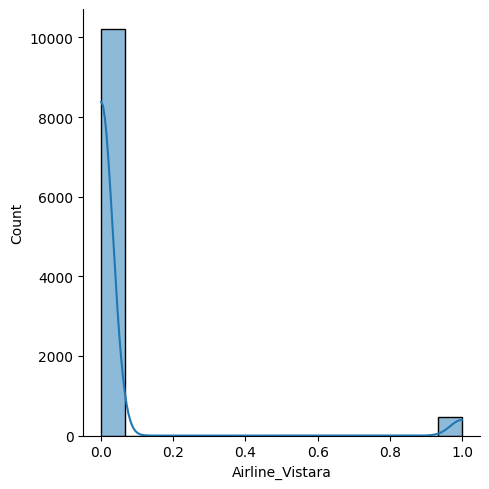

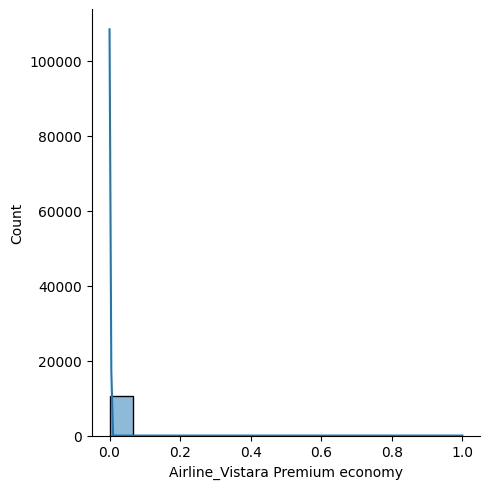

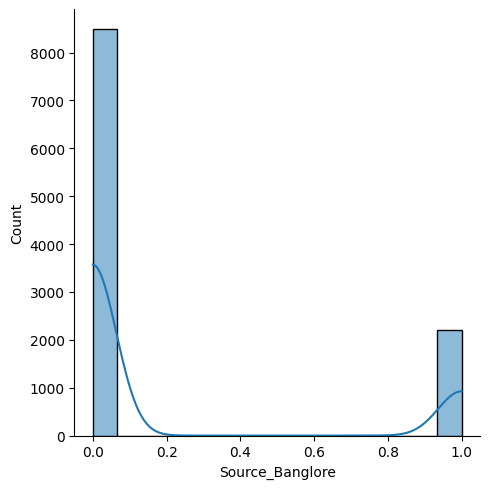

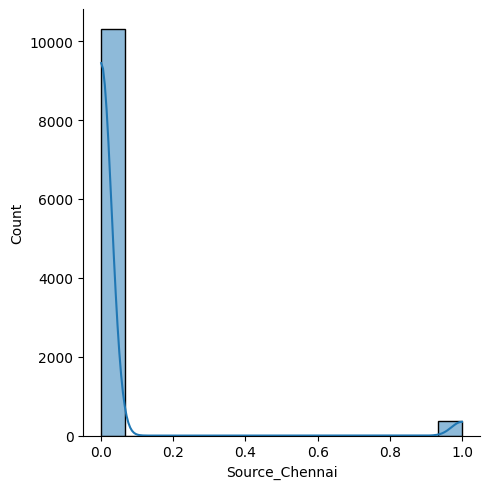

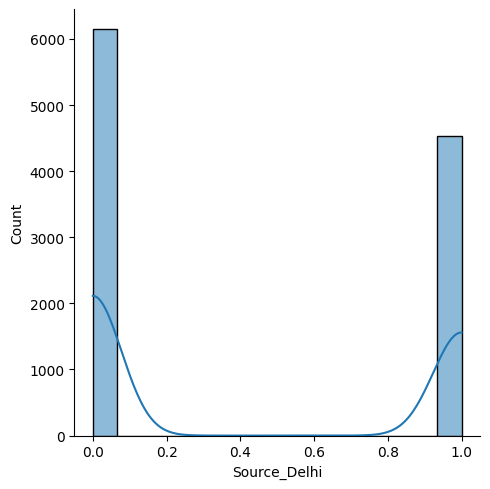

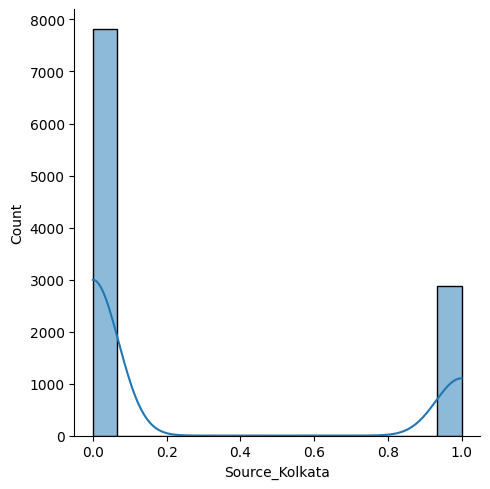

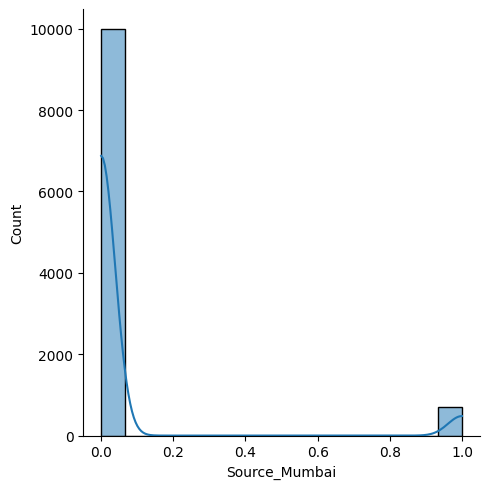

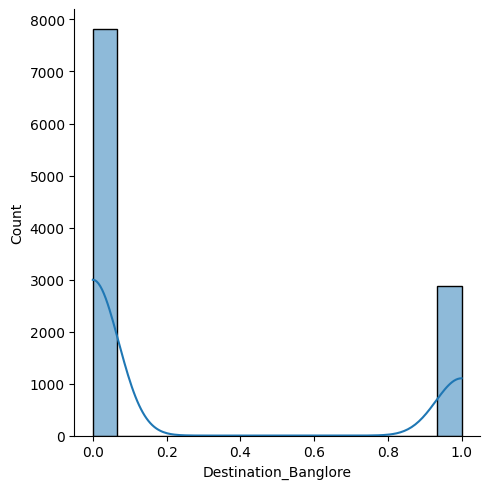

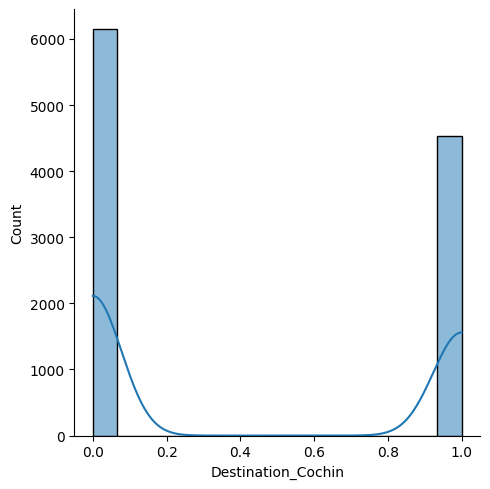

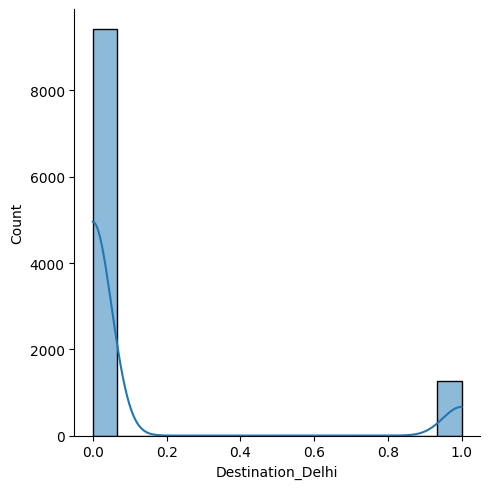

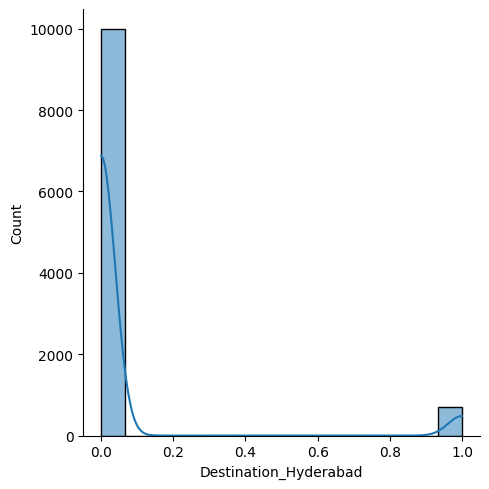

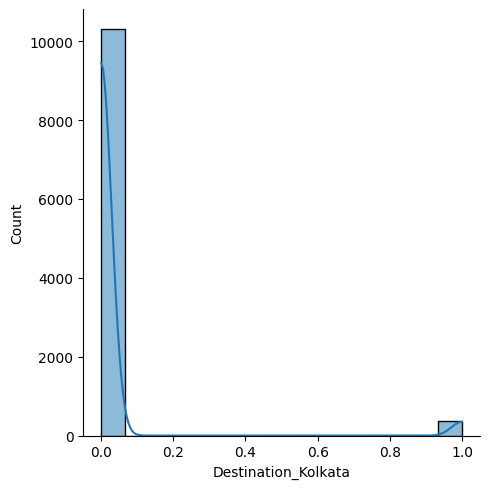

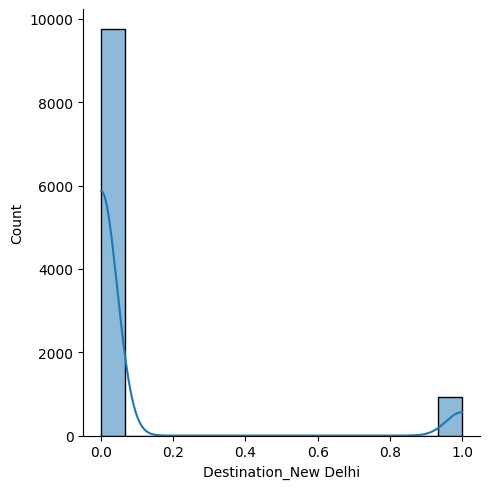

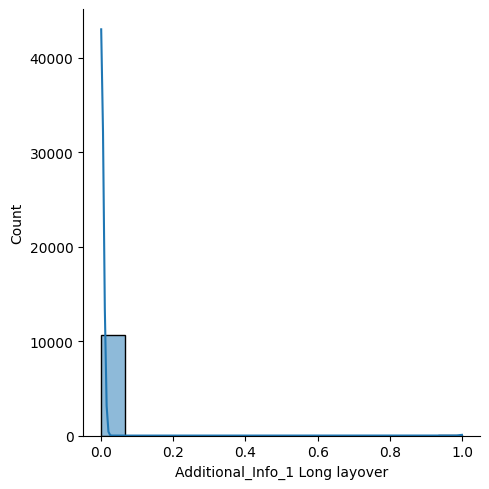

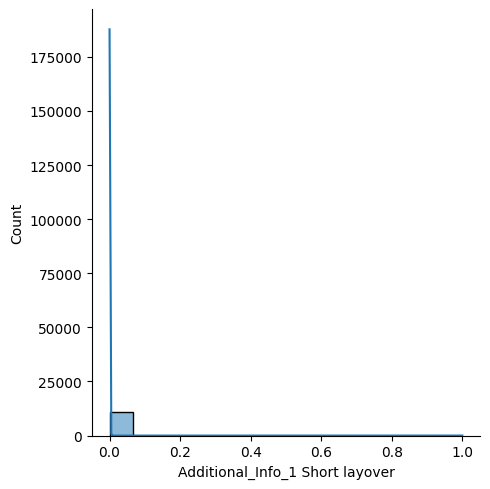

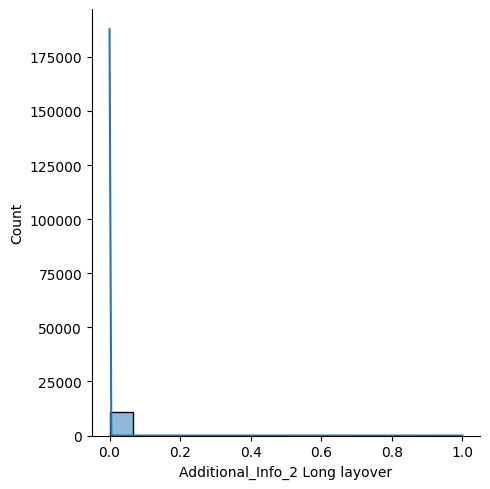

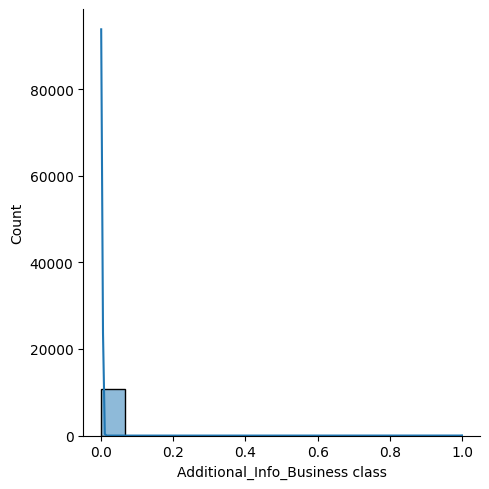

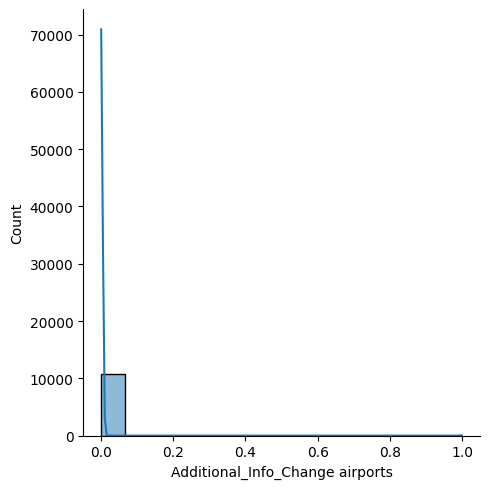

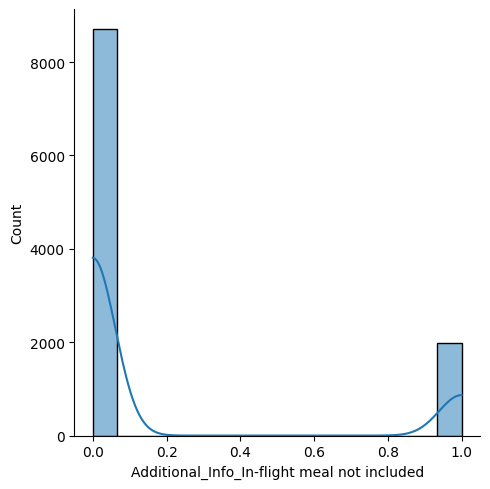

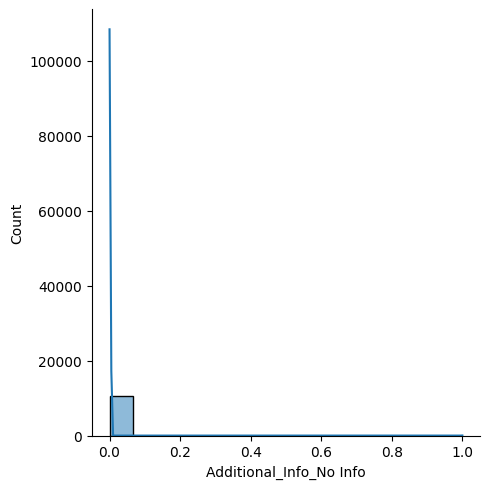

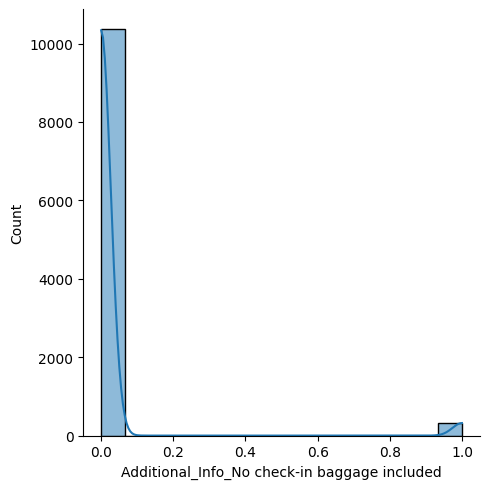

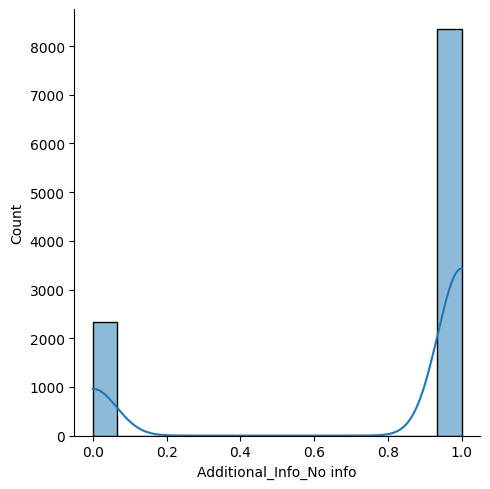

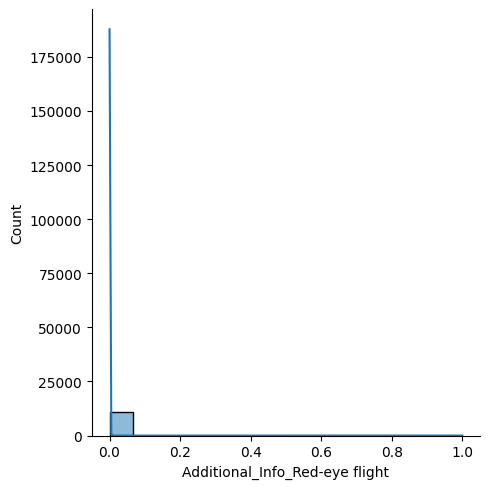

In [124]:
for col in columns:
  sns.displot(final_df[col], kde = True)
  plt.show()

In [ ]:
# internal homework
# univariate analysis
# bivariate analysis
# multivariate analysis
# considering price as target variable seperate X and y
# train test split
# scaling

In [125]:
X = final_df.drop('Price', axis = 1)
y = final_df['Price']

In [126]:
X.shape

(10683, 43)

In [127]:
y.shape

(10683,)

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [131]:
X_train.shape

(8546, 43)

In [132]:
X_test.shape

(2137, 43)

In [133]:
y_train.shape

(8546,)

In [134]:
y_test.shape

(2137,)

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [136]:
scaler

StandardScaler()

In [ ]:
scaler

In [141]:
X_train = scaler.fit_transform(X_train)

In [142]:
X_train

array([[ 1.77810989, -0.16924261, -0.16924261, ..., -0.17503037,
        -1.89255632, -0.01081856],
       [ 1.77810989, -0.52277375, -0.52277375, ..., -0.17503037,
        -1.89255632, -0.01081856],
       [-0.51694824, -0.8763049 , -0.8763049 , ..., -0.17503037,
        -1.89255632, -0.01081856],
       ...,
       [-0.51694824,  0.53781969,  0.53781969, ..., -0.17503037,
         0.52838586, -0.01081856],
       [-0.51694824, -0.16924261, -0.16924261, ..., -0.17503037,
         0.52838586, -0.01081856],
       [        nan, -1.46552347, -1.46552347, ..., -0.17503037,
         0.52838586, -0.01081856]])

In [143]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,1.778110,-0.169243,-0.169243,1.103885,0.815952,-1.495358,-0.603183,0.837581,-0.147486,-0.767230,...,-0.04051,-0.010819,-0.010819,-0.01874,-0.028633,2.097949,-0.015301,-0.17503,-1.892556,-0.010819
1,1.778110,-0.522774,-0.522774,1.103885,-0.202945,0.620378,-1.298686,0.305670,-0.381890,-1.775250,...,-0.04051,-0.010819,-0.010819,-0.01874,-0.028633,2.097949,-0.015301,-0.17503,-1.892556,-0.010819
2,-0.516948,-0.876305,-0.876305,0.245587,1.398178,1.224874,1.135575,-0.226241,-0.733496,-0.431223,...,-0.04051,-0.010819,-0.010819,-0.01874,34.924408,-0.476656,-0.015301,-0.17503,-1.892556,-0.010819
3,-0.516948,0.537820,0.537820,0.245587,-0.639614,0.015882,1.309451,0.837581,0.204119,0.912803,...,-0.04051,-0.010819,-0.010819,-0.01874,-0.028633,-0.476656,-0.015301,-0.17503,0.528386,-0.010819
4,1.778110,1.244882,1.244882,1.103885,0.815952,-0.588614,1.657202,-1.290064,1.258936,-1.103236,...,-0.04051,-0.010819,-0.010819,-0.01874,-0.028633,-0.476656,-0.015301,-0.17503,0.528386,-0.010819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8541,-0.516948,-0.522774,-0.522774,1.103885,-0.202945,-1.495358,1.483327,-0.758152,0.438523,1.248810,...,-0.04051,-0.010819,-0.010819,-0.01874,-0.028633,-0.476656,-0.015301,-0.17503,0.528386,-0.010819
8542,NaN,1.244882,1.244882,-0.612711,0.379282,1.829369,0.266196,0.039714,-0.967899,-0.095216,...,-0.04051,-0.010819,-0.010819,-0.01874,-0.028633,-0.476656,-0.015301,-0.17503,0.528386,-0.010819
8543,-0.516948,0.537820,0.537820,0.245587,0.379282,-0.890862,-0.777059,0.571626,-0.381890,0.240790,...,-0.04051,-0.010819,-0.010819,-0.01874,-0.028633,-0.476656,-0.015301,-0.17503,0.528386,-0.010819
8544,-0.516948,-0.169243,-0.169243,0.245587,-0.639614,1.224874,-0.603183,0.571626,1.610541,-1.439243,...,-0.04051,-0.010819,-0.010819,-0.01874,-0.028633,-0.476656,-0.015301,-0.17503,0.528386,-0.010819


In [144]:
X_test = scaler.transform(X_test)

In [145]:
X_test

array([[        nan,  0.18428854,  0.18428854, ..., -0.17503037,
         0.52838586, -0.01081856],
       [        nan,  0.18428854,  0.18428854, ..., -0.17503037,
         0.52838586, -0.01081856],
       [-0.51694824, -0.52277375, -0.52277375, ..., -0.17503037,
         0.52838586, -0.01081856],
       ...,
       [        nan,  0.89135083,  0.89135083, ..., -0.17503037,
         0.52838586, -0.01081856],
       [-0.51694824, -0.16924261, -0.16924261, ..., -0.17503037,
         0.52838586, -0.01081856],
       [        nan,  0.89135083,  0.89135083, ..., -0.17503037,
         0.52838586, -0.01081856]])

In [146]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,NaN,0.184289,0.184289,-1.471009,-1.949624,-0.890862,1.657202,1.103537,-1.085101,-0.431223,...,-0.04051,-0.010819,-0.010819,-0.01874,-0.028633,-0.476656,-0.015301,-0.175030,0.528386,-0.010819
1,NaN,0.184289,0.184289,-1.471009,-0.202945,0.318130,-0.603183,0.571626,-0.967899,1.584817,...,-0.04051,-0.010819,-0.010819,-0.01874,-0.028633,-0.476656,-0.015301,-0.175030,0.528386,-0.010819
2,-0.516948,-0.522774,-0.522774,1.103885,-1.367397,0.922626,0.613947,0.305670,0.204119,-1.439243,...,-0.04051,-0.010819,-0.010819,-0.01874,-0.028633,-0.476656,-0.015301,-0.175030,0.528386,-0.010819
3,-0.516948,0.537820,0.537820,-1.471009,-0.639614,-1.495358,1.657202,1.369492,-0.030285,-1.439243,...,-0.04051,-0.010819,-0.010819,-0.01874,-0.028633,-0.476656,-0.015301,-0.175030,0.528386,-0.010819
4,-0.516948,0.891351,0.891351,0.245587,0.670395,-0.588614,1.483327,-0.758152,1.258936,-1.775250,...,-0.04051,-0.010819,-0.010819,-0.01874,-0.028633,2.097949,-0.015301,-0.175030,-1.892556,-0.010819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,-0.516948,-1.229836,-1.229836,-1.471009,-0.494058,-1.193110,-1.298686,-1.024108,-0.616294,NaN,...,-0.04051,-0.010819,-0.010819,-0.01874,-0.028633,-0.476656,-0.015301,-0.175030,0.528386,-0.010819
2133,NaN,-0.522774,-0.522774,0.245587,-0.202945,-1.495358,-0.603183,1.103537,-0.967899,-1.103236,...,-0.04051,-0.010819,-0.010819,-0.01874,-0.028633,-0.476656,-0.015301,5.713294,-1.892556,-0.010819
2134,NaN,0.891351,0.891351,1.103885,0.961508,-1.193110,0.787823,1.103537,-0.967899,-0.767230,...,-0.04051,-0.010819,-0.010819,-0.01874,-0.028633,-0.476656,-0.015301,-0.175030,0.528386,-0.010819
2135,-0.516948,-0.169243,-0.169243,1.103885,-1.804067,0.318130,-0.081556,1.369492,0.204119,0.576797,...,-0.04051,-0.010819,-0.010819,-0.01874,-0.028633,-0.476656,-0.015301,-0.175030,0.528386,-0.010819
